# Código para seleção e criação do modelo

In [1]:
import numpy as np
import pandas as pd

In [2]:
def stratified_sample(df, col='CATEGORY', n_per_class=2):
    return df.groupby(col, group_keys=False).apply(
        lambda x: x.sample(min(len(x), n_per_class)))

In [3]:
data = pd.read_csv('../1.scraping/products.tsv', sep='\t')
data.set_index('ID', inplace=True)
data['SMARTPHONE'] = (data.CATEGORY == 'celular-e-smartphone').astype(int)

stratified_sample(data)

,CATEGORY,SOURCE,TITLE,SMARTPHONE
ID,,,,
365,aparelho-de-telefone,https://www.buscape.com.br/redirect_prod?id=37...,Telefone Sem Fio KX - TGC210LBB Panasonic - 84...,0
401,aparelho-de-telefone,https://www.buscape.com.br/sem-fio-motorola-mo...,Sem Fio Motorola Moto 4000 SE,0
615,capa-para-celular-e-smartphone,https://www.buscape.com.br/redirect_prod?id=46...,Capa para Zenfone Go 5.0 ZC500TG Memes 01 MP12...,0
711,capa-para-celular-e-smartphone,https://www.buscape.com.br/redirect_prod?id=46...,Capa para Galaxy Gran Neo Duos Sea Camouflage ...,0
893,celular-e-smartphone,https://www.buscape.com.br/smartphone-motorola...,Smartphone Motorola Moto Z Play XT1635 32GB Po...,1
1162,celular-e-smartphone,https://www.buscape.com.br/smartphone-xiaomi-r...,Smartphone Xiaomi Redmi 6 32GB,1
1450,gabinete,https://www.buscape.com.br/redirect_prod?id=11...,Gabinete Gamer Micro Atx E Atx Azul Vx Typhoon...,0
1652,gabinete,https://www.buscape.com.br/redirect_prod?id=11...,Gabinete K - MEX Gamer CG - 01F5 War Robot Branco,0
1837,jogos-de-rpg,https://www.buscape.com.br/redirect_prod?id=63...,Dungeons & Dragons Castle Ravenloft - Boardgame,0


In [4]:
print('Frequência das primeiras palavras de cada produto categorizado ' +
        'como celular')
phone_titles = data[data.CATEGORY == 'celular-e-smartphone'].TITLE
first_words = phone_titles.apply(lambda t: t.split()[0])

first_words.value_counts()

Frequência das primeiras palavras de cada produto categorizado como celular


Smartphone    419
Celular        61
Name: TITLE, dtype: int64

In [5]:
clean_titles = phone_titles.apply(lambda t: ' '.join(t.split()[1:]))
smartphones = data[data.CATEGORY == 'celular-e-smartphone']
trimmed_smartphones_idx = smartphones.sample(frac=0.4).index
data.loc[trimmed_smartphones_idx, 'TITLE'] = clean_titles

In [6]:
data[data.CATEGORY == 'celular-e-smartphone'].sample(10)

,CATEGORY,SOURCE,TITLE,SMARTPHONE
ID,,,,
1000,celular-e-smartphone,https://www.buscape.com.br/smartphone-alcatel-a7,Alcatel A7,1
1011,celular-e-smartphone,https://www.buscape.com.br/smartphone-asus-zen...,Smartphone Asus ZenFone 3 Zoom 128GB,1
992,celular-e-smartphone,https://www.buscape.com.br/smartphone-lenovo-v...,Smartphone Lenovo Vibe K6 32GB,1
896,celular-e-smartphone,https://www.buscape.com.br/smartphone-samsung-...,Smartphone Samsung Galaxy S Duos GT-S7562,1
1181,celular-e-smartphone,https://www.buscape.com.br/smartphone-motorola...,Smartphone Motorola Moto X Play XT1563 16GB,1
1320,celular-e-smartphone,https://www.buscape.com.br/redirect_prod?id=77...,Motorola Moto E 5 XT1944 16GB,1
917,celular-e-smartphone,https://www.buscape.com.br/smartphone-huawei-a...,Huawei Ascend G510,1
1139,celular-e-smartphone,https://www.buscape.com.br/smartphone-samsung-...,Smartphone Samsung Galaxy J7 SM-J710M 16GB,1
1335,celular-e-smartphone,https://www.buscape.com.br/smartphone-asus-zen...,Smartphone Asus ZenFone Zoom S 128GB 4GB RAM,1


In [7]:
from extract_features import get_df_attributes, attr_col_names

In [8]:
features = get_df_attributes(data)
stratified_sample(features)

,CATEGORY,SOURCE,TITLE,SMARTPHONE,re_smart,re_phone,re_celular,re_letra_num,re_capa,re_para,re_pelicula,re_plus,re_chip,re_MP
ID,,,,,,,,,,,,,,
457,aparelho-de-telefone,https://www.buscape.com.br/sem-fio-elgin-tsf-8...,Sem Fio Elgin TSF-800SE,0,0,0,0,0,0,0,0,0,0,0
161,aparelho-de-telefone,https://www.buscape.com.br/redirect_prod?id=37...,Telefone Retrô Bomba de Gasolina c / Fio MP116...,0,0,1,0,1,0,0,0,0,0,0
517,capa-para-celular-e-smartphone,https://www.buscape.com.br/redirect_prod?id=46...,Capa para Zenfone 2 5.5 Polígonos Abstratos Tr...,0,0,1,0,1,1,1,0,0,0,0
850,capa-para-celular-e-smartphone,https://www.buscape.com.br/redirect_prod?id=46...,Capa para LG G2 Lite Fluminense 01 MP12863318,0,0,0,0,1,1,1,0,0,0,0
999,celular-e-smartphone,https://www.buscape.com.br/smartphone-lg-a100,Smartphone LG A100,1,1,1,0,1,0,0,0,0,0,0
1294,celular-e-smartphone,https://www.buscape.com.br/smartphone-apple-ip...,Smartphone Apple iPhone XS 256GB,1,1,1,0,0,0,0,0,0,0,0
1651,gabinete,https://www.buscape.com.br/redirect_prod?id=11...,Gabinete Vazio GABVOX15X22VIAS 2 Falantes 15 P...,0,0,0,0,1,0,0,0,0,0,0
1425,gabinete,https://www.buscape.com.br/redirect_prod?id=11...,Gabinete Xl - Atx / E - Atx - Corsair Graphite...,0,0,0,0,0,0,0,0,0,0,0
1909,jogos-de-rpg,https://www.buscape.com.br/redirect_prod?id=63...,Cavalinho Torcedor de Pelúcia do Corinthians,0,0,0,0,0,0,0,0,0,0,0


In [9]:
clf_features = features[attr_col_names + ['SMARTPHONE']]
stratified_sample(clf_features, col='SMARTPHONE', n_per_class=5)

,re_smart,re_phone,re_celular,re_letra_num,re_capa,re_para,re_pelicula,re_plus,re_chip,re_MP,SMARTPHONE
ID,,,,,,,,,,,
1368,0,0,0,0,0,0,0,0,0,0,0
450,0,0,0,1,0,0,0,0,0,0,0
2557,0,0,0,1,0,1,0,0,0,0,0
2601,0,0,0,1,0,1,0,0,0,0,0
2977,0,0,0,1,0,0,0,0,0,0,0
880,0,0,0,0,0,0,0,0,0,0,1
1279,0,1,0,0,0,0,0,0,0,0,1
1263,1,1,0,1,0,0,0,0,0,0,1
1067,0,0,0,0,0,0,0,0,0,0,1


In [10]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score

In [11]:
perceptron = Perceptron(max_iter=1e4)
naive_bayes = BernoulliNB(binarize=None)
bag_of_words = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('MNNB', MultinomialNB())
])

In [12]:
def eval_model(model, X, y):
    return cross_val_score(model, X, y, scoring='roc_auc', cv=10)


def print_results(name, cv_score):
    print(name)
    print(f'{np.mean(cv_score):.3f} +- {np.std(cv_score):.3f}')

In [13]:
perceptron_res = eval_model(perceptron, clf_features[attr_col_names].values, clf_features['SMARTPHONE'].values)

In [14]:
naive_bayes_res = eval_model(naive_bayes, clf_features[attr_col_names].values, clf_features['SMARTPHONE'].values)

In [15]:
bow_res = eval_model(bag_of_words, data.TITLE.values, data.SMARTPHONE.values)

In [16]:
print_results('Perceptron', perceptron_res)
print()
print_results('Naive Bayes', naive_bayes_res)
print()
print_results('Bag of Words', bow_res)

Perceptron
0.714 +- 0.223

Naive Bayes
0.807 +- 0.113

Bag of Words
0.994 +- 0.006


In [17]:
from scipy.stats import ttest_ind

test_result = ttest_ind(bow_res, naive_bayes_res)
print(f'p-value: {test_result.pvalue:.3f}')
if test_result.pvalue < 0.05:
    print(f'Classificadores com desempenhos distindos')
else:
    print(f'Não há evidências de que os classificadores tenham desempenhos diferentes')

p-value: 0.000
Classificadores com desempenhos distindos


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [19]:
X = data.TITLE.values
y = data.SMARTPHONE.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [21]:
model = bag_of_words

model.fit(X_train, y_train)
probas = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)

In [22]:
from matplotlib import pyplot as plt

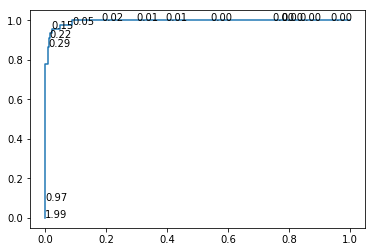

In [23]:
plt.plot(fpr, tpr)
for i, t in enumerate(thresholds):
    if i % 3 == 0:
        plt.text(fpr[i], tpr[i], f'{(t):.2f}')

plt.show()

Threshold escolhido: 0.15

In [24]:
import pickle

In [25]:
model.fit(X, y)
with open('model.clf', 'wb+') as f:
    serialized_model = pickle.dump(model, f)